In [2]:
import os
import boto3
import pandas as pd
import numpy as np
import s3fs
import psycopg2
from sqlalchemy import create_engine
import seaborn as sns

pd.set_option('display.max_columns', None)

## 1. Fetch data from database (Users)
#### Connect to database

In [3]:
# Database connection params
host='linearity-postgres.ci4darskkd34.eu-central-1.rds.amazonaws.com'
port=5432
database='tempdb'
username='linearity-home-assignment-user'
password='e0a1bf24bb7a81de7ac81834343ad6169711366863e0f6d66f71f2280e314668'

# Create db connection engine
try:
    engine = create_engine(f"postgresql+psycopg2://{username}:{password}@{host}:{port}/{database}")
except Exception as e:
    print(e)

#### List all tables to locate users table in public schema

In [3]:
# List all db tables (save to df)
df_db_tables = pd.read_sql(sql='SELECT * FROM information_schema.tables', con=engine)
df_db_tables.head(3)

,table_catalog,table_schema,table_name,table_type,self_referencing_column_name,reference_generation,user_defined_type_catalog,user_defined_type_schema,user_defined_type_name,is_insertable_into,is_typed,commit_action
0,tempdb,public,users,BASE TABLE,None,None,None,None,None,YES,NO,None
1,tempdb,pg_catalog,pg_type,BASE TABLE,None,None,None,None,None,YES,NO,None
2,tempdb,pg_catalog,pg_foreign_table,BASE TABLE,None,None,None,None,None,YES,NO,None


#### List tables in public_schema

In [4]:
# List all db tables in public schema (save to df)
df_db_tables_public = df_db_tables[df_db_tables['table_schema']=='public']
df_db_tables_public

,table_catalog,table_schema,table_name,table_type,self_referencing_column_name,reference_generation,user_defined_type_catalog,user_defined_type_schema,user_defined_type_name,is_insertable_into,is_typed,commit_action
0,tempdb,public,users,BASE TABLE,None,None,None,None,None,YES,NO,None


#### Query users table, save to DF

In [4]:
df_users_app = pd.read_sql(sql='select * from public.users', con=engine)
df_users_app.head(3)

,amplitude_id,user_id,user_creation_time,first_event_at,last_event_at,first_active_event_at,last_active_event_at,server_upload_time,inferred_usecase,country,region,city,language,device_family,platform,latest_version,start_version,icloud_documents,icloud_enabled,os_name,os_version,onboarding_completed_at,activated_at,documents_created,documents_worked_on,tool_changed,documents_exported,activated_in_7_days,onboarded_in_7_days,onboarding_steps,document_created_first_7d,document_created_first_4w,export_first_7d,export_first_4w,document_created_last_7d,document_worked_last_7d,tool_changed_last_7d,export_last_7d,export_last_4w,export_last_12w
0,755140721378,000B4F25-9343-4DCC-A008-1D199676DE3E,2023-10-27 07:31:44.000,2023-10-27 07:31:44.000,2023-10-27 07:31:55.572,2023-10-27 07:31:51.338,2023-10-27 07:31:55.572,2023-10-27 07:32:14.745,None,China,Jiangsu,Suzhou,Chinese,Apple iPad,[\iPadOS\],5.0.2,5.0.2,NaN,False,iPadOS,16.6.1,NaT,NaT,NaN,1,0,0,False,False,toolbar,0,0,0,0,0,1,0,0,0,0
1,738215265394,0019431A-DC21-43AE-BB92-16C4EC530442,2023-10-04 02:32:32.976,2023-10-04 02:32:32.976,2023-10-04 02:45:30.797,2023-10-04 02:32:32.976,2023-10-04 02:45:30.797,2023-10-04 02:45:38.436,None,China,Jiangsu,Nanjing,Chinese,Apple arm64,[\macOS\],5.1.2,5.1.2,NaN,False,macOS,12.6.0,2023-10-04 02:32:40.442,NaT,1.0,1,29,0,False,True,"toolbar, inspector, help",1,1,0,0,1,1,29,0,0,0
2,685837919137,0041BEF9-F2F8-41B9-AE05-3E4771B9CFD8,2023-10-03 16:19:35.533,2023-10-03 16:19:35.533,2023-10-10 14:41:06.926,2023-10-03 16:19:35.533,2023-10-10 14:41:06.926,2023-10-10 14:41:26.590,None,France,Bas-Rhin,Lingolsheim,French,Apple arm64,[\macOS\],5.1.2,5.1.2,NaN,False,macOS,14.0.0,2023-10-03 16:19:55.724,NaT,3.0,3,15,0,False,True,"toolbar, inspector, help",3,3,0,0,2,2,13,0,0,0


##  2. Fetch csv from S3 Bucket (Account Users)

In [5]:
# S3 bucket params
bucket_name = 'data-temp-bucket'
region = 'eu-central-1'
file_name = 'account_users.csv'

# Load csv from S3, save to df
try:
    df_users_be = pd.read_csv(f"s3://{bucket_name}/{file_name}")
except Exception as e:
    print(e)

#### Read data

In [6]:
df_users_be.head(3)

,user_id,language,account_created_at
0,e2c5e4f4-f0d1-7052-4d54-5d976394b8f6,en,2023-10-02 13:04:05.055
1,e2b51444-c011-7069-9be8-8aa0705c185c,en,2023-10-02 13:34:24.032
2,8295c434-6091-709f-449f-9507aee14ec9,en,2023-10-04 09:46:40.081


### Export dataFrames to csv, for Metabase upload

In [7]:
cwd = os.getcwd()
target_dir = 'data'
target_dir = os.path.join(cwd, target_dir)

try:
    if not os.path.exists(target_dir):
        os.makedirs(target_dir)
except Exception as e:
    print(e)

df_users_be.to_csv(f'{target_dir}/df_users_be.csv', index=False)
df_users_app.to_csv(f'{target_dir}/df_users_app.csv', index=False)

### Basis the above two data tables, answer the following using SQL queries:
1. What is the number of users & accounts created on a daily basis?

2. How many users might have interacted with a marketing campaign after their last
active session?

3. How does the app usage looks amongst the users who signed-up vs who did not
sign-up?

4. What percentage of users activated within the first 7 days overall & by split between
signed-up & not signed-up?

5. Is there correlation between onboarding completion & activation?

6. Users from which country are creating the most number of documents & what’s their
exporting percentage?

7. What percentage of users are on the latest version of the application?

8. How many users downloaded the application first and then signed-up vs how many
signed-up first & later downloaded the app?

9. Which os type has better number of exports?

10. How many users never returned after the first week of usage? Also, share by split of
signed-up vs not signed-up

### Plot daily account creations (Web Based Backend System)

<Axes: xlabel='account_creation_date'>

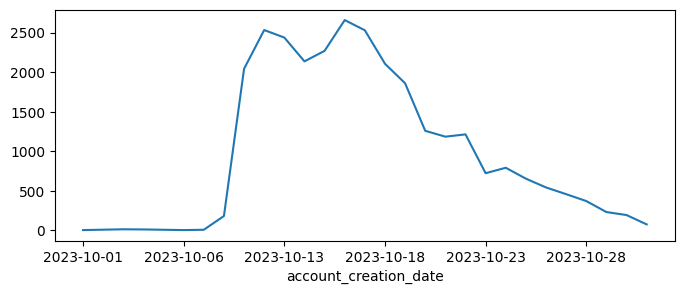

In [8]:
from datetime import datetime

df_users_be['account_creation_date'] = pd.to_datetime(df_users_be['account_created_at'], format='ISO8601')
df_users_be['account_creation_date'] = df_users_be['account_creation_date'].apply(lambda x: x.strftime('%Y-%m-%d'))
df_users_be.groupby('account_creation_date')['user_id'].count().plot(figsize=(8,3))

### Plot daily user creations (App (Amplitude))

<Axes: xlabel='user_creation_date'>

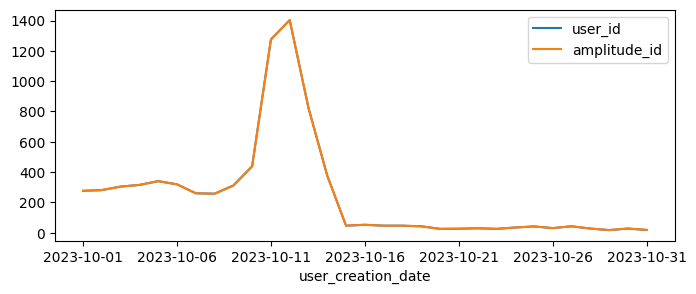

In [9]:
df_users_app['user_creation_date'] = pd.to_datetime(df_users_app['user_creation_time'], format='ISO8601')
df_users_app['user_creation_date'] = df_users_app['user_creation_date'].apply(lambda x: x.strftime('%Y-%m-%d'))
df_users_app.groupby('user_creation_date')[['user_id','amplitude_id']].count().plot(figsize=(8,3))

### Merge dataFrames, creating single user dataset

In [10]:
# Create dataFrame copies
dfua = df_users_app.copy()
dfub = df_users_be.copy()

#Convert user_id (join key) to lowercase for app data
dfua['user_id'] = dfua['user_id'].apply(lambda x: x.lower())

#Add columns to dataFrame to identify if they're app / backend users
dfua['app_user'] = True
dfub['backend_user'] = True

#Merge dataframes on user_id
df = dfub.merge(dfua, how='outer', on='user_id')

#Replace NaN for backend / app users
df['backend_user'].fillna(False, inplace=True)
df['app_user'].fillna(False, inplace=True)

df.head(3)

,user_id,language_x,account_created_at,account_creation_date,backend_user,amplitude_id,user_creation_time,first_event_at,last_event_at,first_active_event_at,last_active_event_at,server_upload_time,inferred_usecase,country,region,city,language_y,device_family,platform,latest_version,start_version,icloud_documents,icloud_enabled,os_name,os_version,onboarding_completed_at,activated_at,documents_created,documents_worked_on,tool_changed,documents_exported,activated_in_7_days,onboarded_in_7_days,onboarding_steps,document_created_first_7d,document_created_first_4w,export_first_7d,export_first_4w,document_created_last_7d,document_worked_last_7d,tool_changed_last_7d,export_last_7d,export_last_4w,export_last_12w,user_creation_date,app_user
0,e2c5e4f4-f0d1-7052-4d54-5d976394b8f6,en,2023-10-02 13:04:05.055,2023-10-02,True,NaN,NaT,NaT,NaT,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,e2b51444-c011-7069-9be8-8aa0705c185c,en,2023-10-02 13:34:24.032,2023-10-02,True,NaN,NaT,NaT,NaT,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,8295c434-6091-709f-449f-9507aee14ec9,en,2023-10-04 09:46:40.081,2023-10-04,True,NaN,NaT,NaT,NaT,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [11]:
#Identify the overlap of users across the backend and app
df.groupby(['backend_user','app_user'])['user_id'].nunique().reset_index().rename(columns={'user_id':'users'})

,backend_user,app_user,users
0,False,True,3787
1,True,False,24726
2,True,True,3764


In [12]:
df.head(3)

,user_id,language_x,account_created_at,account_creation_date,backend_user,amplitude_id,user_creation_time,first_event_at,last_event_at,first_active_event_at,last_active_event_at,server_upload_time,inferred_usecase,country,region,city,language_y,device_family,platform,latest_version,start_version,icloud_documents,icloud_enabled,os_name,os_version,onboarding_completed_at,activated_at,documents_created,documents_worked_on,tool_changed,documents_exported,activated_in_7_days,onboarded_in_7_days,onboarding_steps,document_created_first_7d,document_created_first_4w,export_first_7d,export_first_4w,document_created_last_7d,document_worked_last_7d,tool_changed_last_7d,export_last_7d,export_last_4w,export_last_12w,user_creation_date,app_user
0,e2c5e4f4-f0d1-7052-4d54-5d976394b8f6,en,2023-10-02 13:04:05.055,2023-10-02,True,NaN,NaT,NaT,NaT,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,e2b51444-c011-7069-9be8-8aa0705c185c,en,2023-10-02 13:34:24.032,2023-10-02,True,NaN,NaT,NaT,NaT,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,8295c434-6091-709f-449f-9507aee14ec9,en,2023-10-04 09:46:40.081,2023-10-04,True,NaN,NaT,NaT,NaT,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


### 1. What is the number of users & accounts created on a daily basis?

<Axes: xlabel='date'>

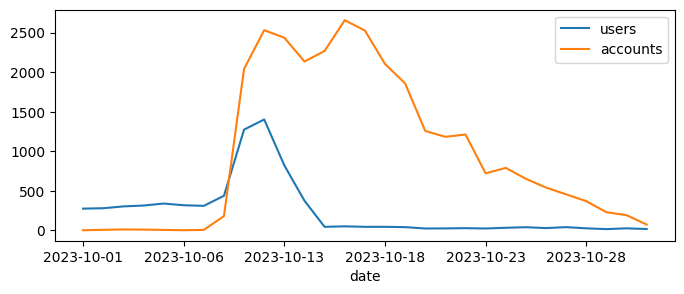

In [13]:
# Create copies of base DF and rename
users_created_daily = df.copy()
accounts_created_daily = df.copy()

# Group per day and calculate users / accounts created
users_created_daily = users_created_daily.groupby('user_creation_date')['user_id'].count().reset_index()
accounts_created_daily = accounts_created_daily.groupby('account_creation_date')['user_id'].count().reset_index()

#Rename columns
users_created_daily = users_created_daily.rename(columns={'user_creation_date':'date', 'user_id':'users'})
accounts_created_daily = accounts_created_daily.rename(columns={'account_creation_date':'date', 'user_id':'accounts'})

#Join data
users_and_accounts_created_daily = users_created_daily.merge(accounts_created_daily, on='date')

#Plot Data
users_and_accounts_created_daily.plot(x='date', y=['users','accounts'], figsize=(8,3))

In [14]:
#users_and_accounts_created_daily['accounts'].rolling(3).mean()
#users_and_accounts_created_daily['users'].rolling(3).mean()

### 2. How many users might have interacted with a marketing campaign after their last active session?

Event - Any event sent via the app client, can consist of marketing events as well such opening of a notification.

Active event - An event is considered active only if it involves user actions or activities such as drawing something or creating a new document. Marketing events are filtered out from thes


In [15]:
#Create copy of base DF and rename
df_marketing_interaction_users = df_users_app.copy()

#Create column (flag: marketing event after active event) if last_event_at > last_active_event_at
df_marketing_interaction_users['flag_marketing_event_after_active_event'] = df_marketing_interaction_users.apply(lambda x: 1 if x['last_event_at'] > x['last_active_event_at'] else 0, axis=1)

#Remove irrelevant columns
df_marketing_interaction_users = df_marketing_interaction_users[['user_id','last_event_at', 'last_active_event_at','flag_marketing_event_after_active_event']]

# Calculate share of marketing interaction 
all_users = df_marketing_interaction_users['flag_marketing_event_after_active_event'].count() 
marketing_interaction_users = df_marketing_interaction_users['flag_marketing_event_after_active_event'].sum()
marketing_interaction_user_share = marketing_interaction_users / all_users

#Print Result
print(f"Users with possible marketing campaign interaction after last session: {round(marketing_interaction_user_share*100,2)}% ")

Users with possible marketing campaign interaction after last session: 7.99% 


### 3. How does the app usage looks amongst the users who signed-up vs who did not sign-up?

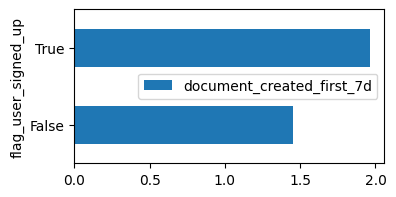

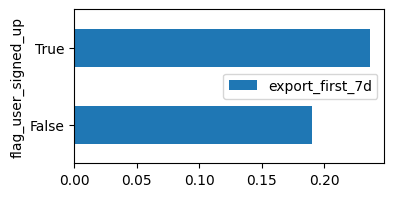

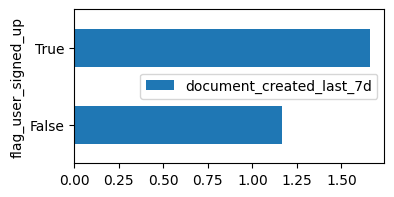

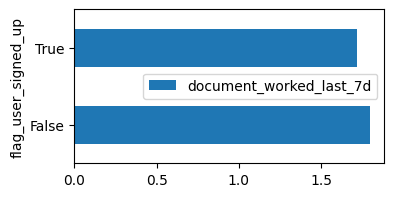

In [16]:
#Create copy of base DF and rename
df_app_usage = df.copy()
df_app_usage = df_app_usage[df_app_usage['app_user']==True].reset_index(drop=True)


#Create new column for if users signed up
df_app_usage['flag_user_signed_up'] = df_app_usage.apply(lambda x: True if pd.isnull(x['account_created_at']) == False else False, axis=1)

# Create function to plot mean app usage for different kpis
def plot_mean_app_usage(df, kpi):
    fig = df_app_usage.groupby('flag_user_signed_up')[[kpi]].mean().plot(kind='barh', figsize=(4,2))
    return fig

# Create KPIs
df_app_usage_kpis = [
     'document_created_first_7d'
    ,'export_first_7d'
    ,'document_created_last_7d'
    ,'document_worked_last_7d'
]

#Loop through KPIs and plot
for kpi in df_app_usage_kpis:
    plot_mean_app_usage(df_app_usage, kpi)

### 4. What percentage of users activated within the first 7 days overall & by split between signed-up & not signed-up?

In [18]:
#Create base DF copy and rename
df_user_activation = df.copy()
df_user_activation = df_user_activation[df_user_activation['app_user']==True].reset_index(drop=True)

#Create new column for if users signed up
df_user_activation['flag_user_signed_up'] = df_user_activation.apply(lambda x: True if pd.isnull(x['account_created_at']) == False else False, axis=1)

#Group results and calculate activation rate
df_user_activation = df_user_activation.groupby('flag_user_signed_up')['activated_in_7_days'].mean().reset_index()

#Format column to %
df_user_activation['activated_in_7_days'] = df_user_activation['activated_in_7_days'].apply(lambda x: f"{round(x*100,2)}%" )

#Display results
df_user_activation

,flag_user_signed_up,activated_in_7_days
0,False,10.59%
1,True,13.42%


### 5. Is there correlation between onboarding completion & activation?

In [19]:
#Create base DF copy and rename
onboarding_activation_corr = df.copy()
onboarding_activation_corr = onboarding_activation_corr[onboarding_activation_corr['app_user']==True].reset_index(drop=True)
onboarding_activation_corr = onboarding_activation_corr[['onboarded_in_7_days','activated_in_7_days']]

#Replace True / False values with 1/0
onboarding_activation_corr.replace(False, 0, inplace=True)
onboarding_activation_corr.replace(True, 1, inplace=True)


#onboarding_activation_corr.plot()
round(onboarding_activation_corr.corr(),3)

,onboarded_in_7_days,activated_in_7_days
onboarded_in_7_days,1.000,0.121
activated_in_7_days,0.121,1.000


### 6. Users from which country are creating the most number of documents & what’s their exporting percentage?

In [20]:
#Create base DF copy and rename
df_documents_by_country = df.copy()
df_documents_by_country = df_documents_by_country[df_documents_by_country['app_user']==True]


# Group by country, agg KPIs and rename
df_documents_by_country = df_documents_by_country.groupby('country').agg({'user_id':'count','documents_created':'sum','documents_exported':'sum'}).reset_index()
df_documents_by_country = df_documents_by_country.rename(columns={'user_id':'users'})

# Add missing Kpis
df_documents_by_country['export_share'] = round(df_documents_by_country['documents_exported'] / df_documents_by_country['documents_created'],3) 
df_documents_by_country['documents_per_user'] = round(df_documents_by_country['documents_created'] / df_documents_by_country['users'],3) 

# List top 5 countries (By documents created)
df_documents_by_country.sort_values(by='documents_created', ascending=False).head(3)

,country,users,documents_created,documents_exported,export_share,documents_per_user
143,United States,1477,2953.0,473.0,0.160,1.999
113,Russia,501,1029.0,137.0,0.133,2.054
45,Germany,404,759.0,113.0,0.149,1.879


### 7. What percentage of users are on the latest version of the application?

In [21]:
#Create base DF copy and rename
df_user_app_version = df.copy()
df_user_app_version = df_user_app_version[df_user_app_version['app_user']==True]

# Identify latest app_version
df_app_version_grouped = df_user_app_version.groupby('latest_version').agg({'user_id':'count'}).reset_index().rename(columns={'user_id':'users'})

#Calculate and format user share
df_app_version_grouped['user_share'] = df_app_version_grouped['users'] / df_app_version_grouped['users'].sum()
df_app_version_grouped['user_share'] = df_app_version_grouped['user_share'].apply(lambda x: f"{round(x*100,2)}%" )

#Display results
df_app_version_grouped.sort_values(by='latest_version', ascending=False).head(5)

,latest_version,users,user_share
79,5.2.3,24,0.34%
78,5.2.2,317,4.49%
77,5.2.1,624,8.83%
76,5.2.0,2535,35.89%
75,5.1.2,2887,40.87%


### 8. How many users downloaded the application first and then signed-up vs how many signed-up first & later downloaded the app?

In [22]:
#Create base DF copy and rename
df_signup_and_downloads = df.copy()
df_signup_and_downloads = df_signup_and_downloads[(df_signup_and_downloads['app_user']==True) & (df_signup_and_downloads['account_created_at'].isna()==False)]

#Create 2 new columns to identify if download happened before/after signup
df_signup_and_downloads['flag_download_before_signup'] = df_signup_and_downloads.apply(lambda x: True if x['user_creation_time'] > pd.to_datetime(x['account_created_at']) else False, axis=1)
df_signup_and_downloads['flag_signup_before_download'] = df_signup_and_downloads.apply(lambda x: True if x['user_creation_time'] < pd.to_datetime(x['account_created_at']) else False, axis=1)

#Group data by newly created columns & rename user count
df_signup_and_downloads = df_signup_and_downloads.groupby(['flag_download_before_signup','flag_signup_before_download'])['user_id'].count().reset_index()
df_signup_and_downloads = df_signup_and_downloads.rename(columns = {'user_id':'users'})

#Calculate user share %
df_signup_and_downloads['user_share'] = df_signup_and_downloads['users'] / df_signup_and_downloads['users'].sum()
df_signup_and_downloads['user_share'] = df_signup_and_downloads['user_share'].apply(lambda x: f"{round(x*100,2)}%" )

#Display result
df_signup_and_downloads

,flag_download_before_signup,flag_signup_before_download,users,user_share
0,False,True,3064,81.4%
1,True,False,700,18.6%


### 9. Which os type has better number of exports?

In [23]:
#Create base DF copy and rename
df_os_exports = df.copy()
df_os_exports = df_os_exports[df_os_exports['app_user']==True]

#Group by os and calculate export KPIs
df_os_exports = df_os_exports.groupby('os_name').agg({'user_id':'count','documents_exported':'sum'})

#Rename users column
df_os_exports = df_os_exports.rename(columns={'user_id':'users'})

#Calculate exports per user
df_os_exports['documents_exported_per_user'] = round(df_os_exports['documents_exported'] / df_os_exports['users'],2)

#Display results
df_os_exports.sort_values(by='documents_exported', ascending=False)

,users,documents_exported,documents_exported_per_user
os_name,,,
iPadOS,3793,1188.0,0.31
macOS,1305,429.0,0.33
iOS,1660,255.0,0.15


### 10. How many users never returned after the first week of usage? Also, share by split of signed-up vs not signed-up

In [24]:
#Create base DF copy and rename
df_user_churn = df.copy()
df_user_churn = df_user_churn[df_user_churn['app_user']==True]

#Create new column to segment users who returned 7-days after their creation date
df_user_churn['flag_returned_after_7d'] = df_user_churn.apply(lambda x: True if (x['last_event_at'] - x['user_creation_time']).days > 6 else False, axis=1)

#Group data and aggregate
df_user_churn = df_user_churn.groupby('flag_returned_after_7d')['user_id'].count().reset_index()

#Rename users column
df_user_churn = df_user_churn.rename(columns={'user_id':'users'})

#Create user share column
df_user_churn['user_share'] = df_user_churn['users'] / df_user_churn['users'].sum()
df_user_churn['user_share'] = df_user_churn['user_share'].apply(lambda x: f"{round(x*100,2)}%" )

#Display results
df_user_churn[df_user_churn['flag_returned_after_7d'] == True]

,flag_returned_after_7d,users,user_share
1,True,1050,13.91%


### 10. Continued: Split by Signed-up vs not signed-up

In [25]:
#Create base DF copy and rename
df_user_churn = df.copy()
df_user_churn = df_user_churn[df_user_churn['app_user']==True]

#Create new column to segment users who returned 7-days after their creation date & if user signed_up
df_user_churn['flag_returned_after_7d'] = df_user_churn.apply(lambda x: True if (x['last_event_at'] - x['user_creation_time']).days > 6 else False, axis=1)
df_user_churn['flag_user_signed_up'] = df_user_churn.apply(lambda x: True if pd.isnull(x['account_created_at']) == False else False, axis=1)

#Group data and aggregate
df_user_churn = df_user_churn.groupby(['flag_returned_after_7d','flag_user_signed_up'])['user_id'].count().reset_index()

#Rename users column
df_user_churn = df_user_churn.rename(columns={'user_id':'users'})

#Create user share column
df_user_churn['user_share'] = df_user_churn['users'] / df_user_churn.groupby('flag_user_signed_up')['users'].transform('sum')
df_user_churn['user_share'] = df_user_churn['user_share'].apply(lambda x: f"{round(x*100,2)}%" )

#Display results
df_user_churn[df_user_churn['flag_returned_after_7d'] == True]

,flag_returned_after_7d,flag_user_signed_up,users,user_share
2,True,False,554,14.63%
3,True,True,496,13.18%
